In [259]:
# installing libraries and packages to load in 
!pip install squarify
import numpy as np
import pandas as pd
from scipy import stats
import squarify as sq
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [260]:
# Reading the dataset
filename='/content/top50.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [0]:
# Renaming the columns
#Datatypes of the columns
#track_name           String  :Name of the Track
#artist_name          String  :Name of the Artist
#Genre                String  :The genre of the track
#beats_per_minute     integer :The tempo of the song.
#Energy               integer :The energy of a song - the higher the value, the more energtic the song
#Danceability         integer :The higher the value, the easier it is to dance to this song.
#Loudness(dB)         integer :The higher the value, the louder the song.
#Liveness             integer :The higher the value, the more likely the song is a live recording.
#Valence              integer :The higher the value, the more positive mood for the song.
#Length               integer :The duration of the song.
#Acousticness         integer :The higher the value the more acoustic the song is.
#Speechiness          integer :The higher the value the more spoken word the song contains.
#Popularity           integer :The higher the value the more popular the song is. Thus the number of streams.
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)

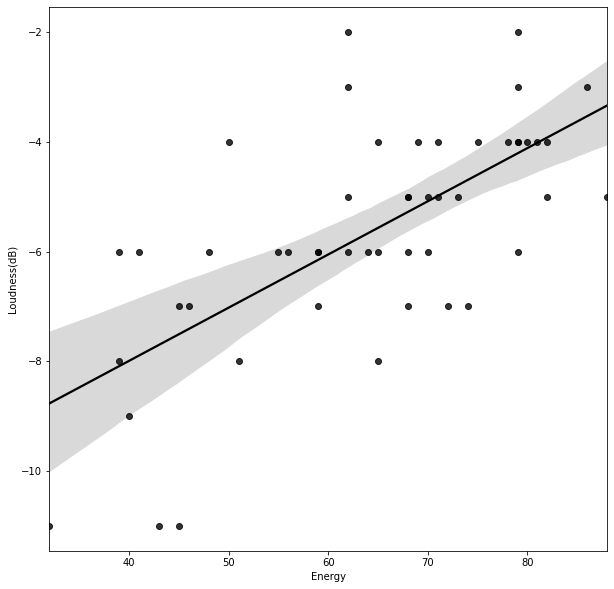

In [262]:
# Analysing the relationship between energy and loudness using linear regression
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='Loudness(dB)',data=df,color='black')

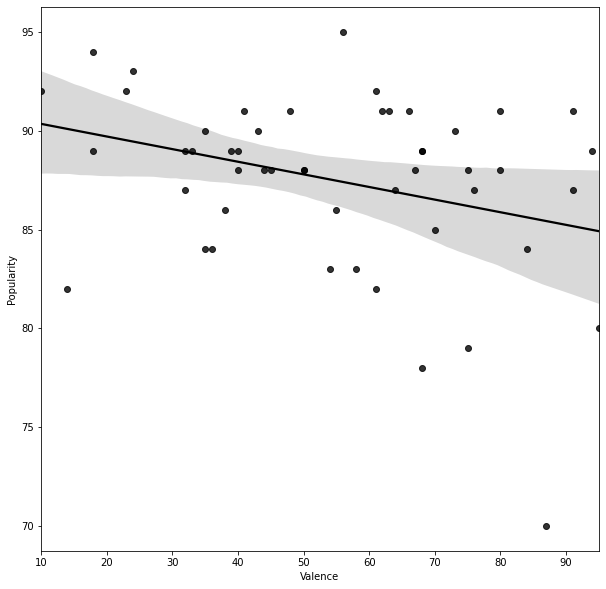

In [268]:
# Analysing the relationship between popularity and valence using linear regression
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Valence',y='Popularity',data=df,color='black')

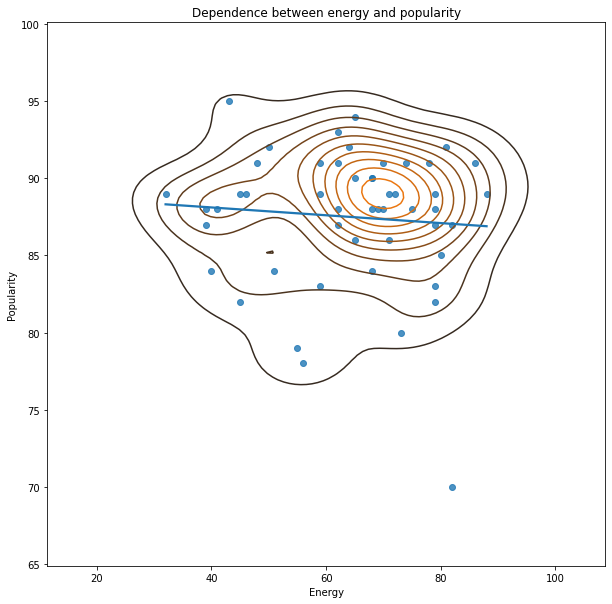

In [264]:
# Analysing the relationship between popularity and energy using kernel density estimation
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between energy and popularity')
sns.regplot(x='Energy', y='Popularity',
            ci=None, data=df)
sns.kdeplot(df.Energy,df.Popularity)

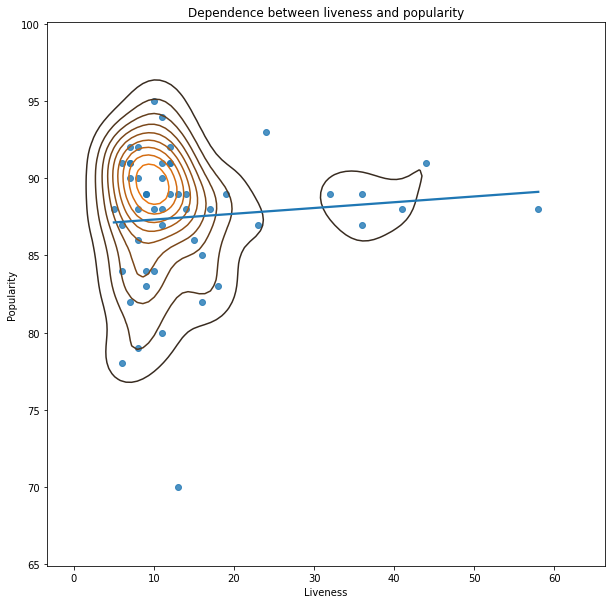

In [265]:
# Analysing the relationship between popularity and liveness using kernel density estimation
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between liveness and popularity')
sns.regplot(x='Liveness', y='Popularity',
            ci=None, data=df)
sns.kdeplot(df.Liveness,df.Popularity)

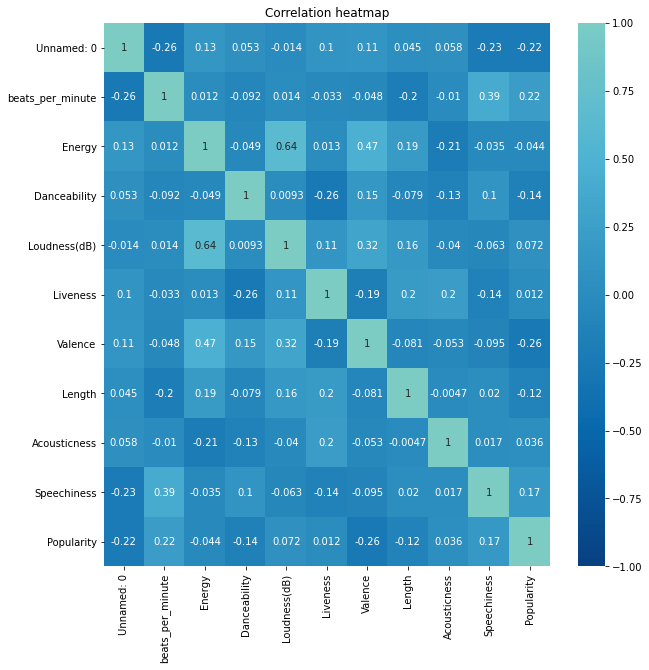

In [274]:
# heatmap of the correlation 
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlation=df.corr(method='spearman')
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)